In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Load the data
data = pd.read_csv('contohdata.csv')


In [8]:
data.head()


,Pelatihan,Kelas,Mulai,Selesai
0,Training of Facilitator Program Standardisasi ...,2,2024-01-22,2024-02-01
1,Pelatihan Persiapan Uji Kompetensi Pengadaan B...,1,2024-01-22,2024-01-25
2,Pelatihan Jarak Jauh Bendahara Pengeluaran/Ben...,6,2024-01-29,2024-02-02
3,Pelatihan Analisis Dampak Treasury terhadap Se...,1,2024-01-29,2024-02-02
4,Pelatihan Pengadaan Barang/Jasa Pemerintah: Pe...,1,2024-01-29,2024-02-01


In [10]:
# Expand the dates for each event
data['Mulai'] = pd.to_datetime(data['Mulai'])
data['Selesai'] = pd.to_datetime(data['Selesai'])

# Create a DataFrame with all dates in the range
all_dates = pd.date_range(start=data['Mulai'].min(), end=data['Selesai'].max())
heatmap_data = pd.DataFrame(0, index=all_dates, columns=['Kelas'])

# Aggregate the data
for _, row in data.iterrows():
    event_dates = pd.date_range(start=row['Mulai'], end=row['Selesai'])
    heatmap_data.loc[event_dates, 'Kelas'] += row['Kelas']


In [20]:
# Reshape the data for the heatmap
heatmap_data['Day'] = heatmap_data.index.day
heatmap_data['Month'] = heatmap_data.index.month

In [19]:
heatmap_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2024-01-22 to 2024-07-12
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Kelas   173 non-null    int64
 1   Day     173 non-null    int32
 2   Month   173 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 8.1 KB


In [21]:
heatmap_data

,Kelas,Day,Month
2024-01-22,3,22,1
2024-01-23,3,23,1
2024-01-24,3,24,1
2024-01-25,3,25,1
2024-01-26,2,26,1
...,...,...,...
2024-07-08,2,8,7
2024-07-09,2,9,7
2024-07-10,2,10,7
2024-07-11,2,11,7


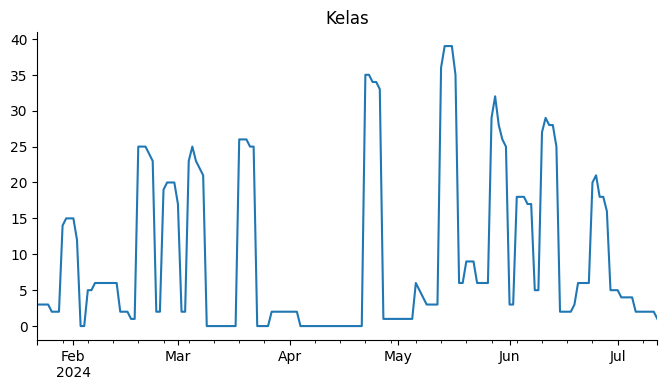

In [24]:
# @title Kelas

from matplotlib import pyplot as plt
heatmap_data['Kelas'].plot(kind='line', figsize=(8, 4), title='Kelas')
plt.gca().spines[['top', 'right']].set_visible(False)

In [27]:
#import calender map
!pip install calmap


In [28]:
import calmap

<Axes: >

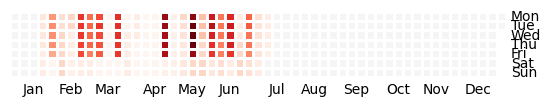

In [32]:
calmap.yearplot(heatmap_data['Kelas'], year=2024)